<a href="https://colab.research.google.com/github/mikhailstasyuk/dls-mipt/blob/main/_homework_4_2__game_of_thrones_prediction_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

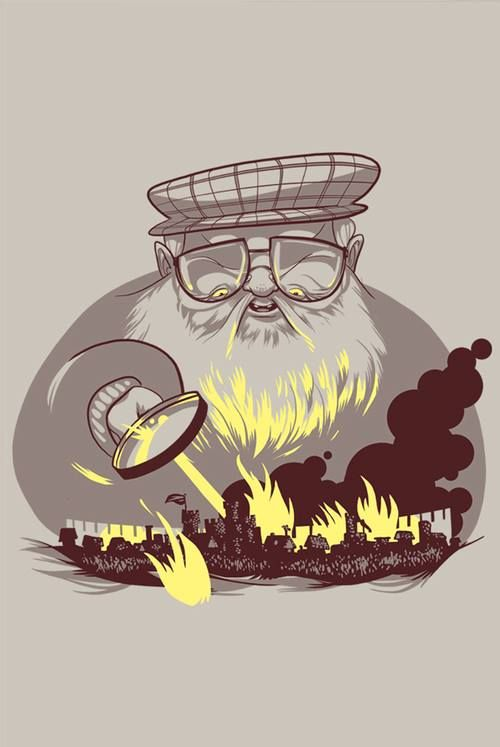

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [978]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 56.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 77.5MB/s]


In [979]:
!mkdir -p data/
!mv game_of_thrones_test.csv data/
!mv game_of_thrones_train.csv data/

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [980]:
import random
import pathlib
import textwrap
from typing import Tuple, Dict, List

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

import matplotlib.pyplot as plt

ROOT_DIR = pathlib.Path().absolute()
DATA_DIR = ROOT_DIR/'data'

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [981]:
df = pd.read_csv(DATA_DIR/"game_of_thrones_train.csv", index_col="S.No")
df.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [1109]:
def get_value(x):
    if x[0] == '1' and x[-1] == '0':
        return 0
    elif x[-1] == '1':
        return 1
    else:
        return 0.5

get_value('10010')

0

In [1115]:
class Preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.survival_rates_ = None
        self.default_survival_rate_ = None
        self.columns_ = None

    def calculate_book_consistency(self, pattern):
        """
        Отношение последовательных появлений персонажа
        в книгах к общему числу книг.
        """
        num_books = len(pattern)

        max_consecutive_ones = max(len(seq) for seq in pattern.split('0'))

        return max_consecutive_ones / num_books

    def get_value(self, x):
        if x[0] == '1' and x[-1] == '0':
            return 0
        elif x[-1] == '1':
            return 1
        else:
            return 0.5

    def create_book_pattern(self, X):
      """
      Создадим новый признак book_pattern, который отражает
      последовательность появления персонажа в книгах
      """
      book_cols = ["book1", "book2", "book3", "book4", "book5"]
      X["book_pattern"] = X[book_cols].apply(
                lambda x: "".join(x.astype(str)), axis=1)

      X["num_books"] = X[book_cols].sum(axis=1)
      X["position_in_series"] = X.book_pattern.apply(self.get_value)
      return X

    def fit(self, X, y=None):
      """
      """
      if y is not None:
          X = self.create_book_pattern(X)
          Xy = pd.concat((X, y), axis=1)

          # Рассчитаем долю выживших для каждой последовательности
          # и добавим их в исходный набор данных
          self.survival_rates_ = (
              Xy.groupby("book_pattern")["isAlive"].mean().reset_index())
          self.survival_rates_.columns = ['book_pattern', 'survival_rate']
          self.default_survival_rate_ = Xy["isAlive"].mean()
      return self

    def transform(self, X, y=None):
        """
        """
        X = X.copy()
        X = X.dropna(axis=1)

        X['isPopular'] = (X.popularity >= 0.2).astype(int)
        X["boolDeadRelations"] = (X.numDeadRelations > 0).astype(int)

        # Добавляем доли выживших рассчитанные в fit
        X = self.create_book_pattern(X)

        X_merged = X.merge(self.survival_rates_, on='book_pattern', how='left')
        X_merged.index = X.index
        # print(X_merged.num_books)


        # X_merged = X_merged.drop(columns=["name", "male", "isMarried", "isNoble", "numDeadRelations", "boolDeadRelations"])

        X_merged = X_merged.fillna(
            {'survival_rate': self.default_survival_rate_ })

        X_merged["popularity_survival"] = X_merged.popularity * X_merged.survival_rate
        X_merged["survival^2"] = X_merged.survival_rate**2
        X_merged["popularity^2"] = X_merged.popularity**2
        X_merged["popularity_survival^2"] = X_merged.popularity_survival**2


        X_merged = self.create_book_pattern(X_merged)
        X_merged["book_consistency"] = X_merged["book_pattern"].apply(self.calculate_book_consistency)


        if self.columns_ is None:
            self.columns_ = X_merged.columns
        else:
            X_merged = X_merged.reindex(columns=self.columns_, fill_value=0)

        X_merged = X_merged.drop(columns=["book_pattern", "name", "isPopular", "male", "isMarried", "isNoble", "numDeadRelations", "boolDeadRelations"])

        X_merged = X_merged.drop(columns=["book1", "book2", "book3", "book4", "book5"])
        # print(X_merged.isna().sum())
        return X_merged

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X, y)

In [1116]:
preprocessor = Preprocessor()
X, y = df.drop(columns=["isAlive"]), df.isAlive
X_processed = preprocessor.fit_transform(X, y)
X_processed


,popularity,num_books,position_in_series,survival_rate,popularity_survival,survival^2,popularity^2,popularity_survival^2,book_consistency
S.No,,,,,,,,,
1,0.605351,0,0.5,0.589744,0.357002,0.347798,0.366450,0.127450,0.0
2,0.896321,5,1.0,0.804348,0.720954,0.646975,0.803391,0.519775,1.0
3,0.267559,1,0.5,0.950820,0.254400,0.904058,0.071588,0.064719,0.2
4,0.183946,0,0.5,0.589744,0.108481,0.347798,0.033836,0.011768,0.0
5,0.043478,1,0.5,0.950820,0.041340,0.904058,0.001890,0.001709,0.2
...,...,...,...,...,...,...,...,...,...
1553,0.160535,3,0.0,1.000000,0.160535,1.000000,0.025772,0.025772,0.4
1554,0.040134,2,0.0,0.333333,0.013378,0.111111,0.001611,0.000179,0.4
1555,0.076923,4,1.0,0.781250,0.060096,0.610352,0.005917,0.003612,0.8


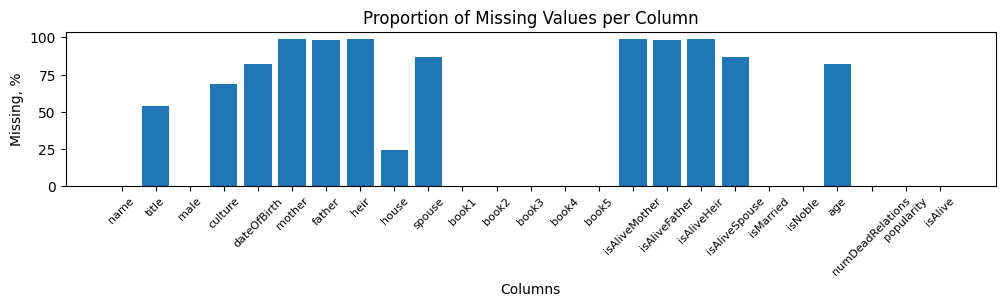

In [1117]:
# Построим столбчатую диаграмму для долей пропущенных значений в признаках
def plot_nan_proportion(df: pd.DataFrame)-> None:
    """Plot rate of missing values per column."""
    nan_rates = df.isna().sum() * 100 / len(df)

    plt.figure(figsize=(12, 2))
    plt.bar(nan_rates.keys(), nan_rates.values)
    plt.title("Proportion of Missing Values per Column")
    plt.xlabel("Columns")
    plt.ylabel("Missing, %")
    plt.xticks(rotation=45, fontsize=8)

    plt.show()

plot_nan_proportion(df)

In [1118]:
# def replace_with_mode(df: pd.DataFrame, feature: str)-> pd.DataFrame:
#     mode, *_ = df[feature].mode()
#     df[feature] = df[feature].fillna(mode)
#     return df

# # Заменим пропуски в столбце признака house
# df_house_nona = replace_with_mode(df, "house")

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [1119]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [1120]:
lookup_dict = {v: k for k, values in cult.items() for v in values}

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [1121]:
X_preprocessed = preprocessor.fit_transform(X, y)

df_preprocessed = pd.concat((X_preprocessed, y), axis=1)
df_preprocessed

,popularity,num_books,position_in_series,survival_rate,popularity_survival,survival^2,popularity^2,popularity_survival^2,book_consistency,isAlive
S.No,,,,,,,,,,
1,0.605351,0,0.5,0.589744,0.357002,0.347798,0.366450,0.127450,0.0,0
2,0.896321,5,1.0,0.804348,0.720954,0.646975,0.803391,0.519775,1.0,1
3,0.267559,1,0.5,0.950820,0.254400,0.904058,0.071588,0.064719,0.2,1
4,0.183946,0,0.5,0.589744,0.108481,0.347798,0.033836,0.011768,0.0,0
5,0.043478,1,0.5,0.950820,0.041340,0.904058,0.001890,0.001709,0.2,1
...,...,...,...,...,...,...,...,...,...,...
1553,0.160535,3,0.0,1.000000,0.160535,1.000000,0.025772,0.025772,0.4,1
1554,0.040134,2,0.0,0.333333,0.013378,0.111111,0.001611,0.000179,0.4,0
1555,0.076923,4,1.0,0.781250,0.060096,0.610352,0.005917,0.003612,0.8,0


In [1122]:
df_preprocessed.isna().sum()

,0
popularity,0
num_books,0
position_in_series,0
survival_rate,0
popularity_survival,0
survival^2,0
popularity^2,0
popularity_survival^2,0
book_consistency,0
isAlive,0


In [1123]:
correlation_mat = df_preprocessed.corr()
print(correlation_mat["isAlive"].sort_values(ascending=False))

isAlive                  1.000000
survival_rate            0.392781
survival^2               0.385922
book_consistency         0.085834
position_in_series       0.084276
num_books                0.071894
popularity_survival^2   -0.061844
popularity^2            -0.114675
popularity_survival     -0.127037
popularity              -0.194187
Name: isAlive, dtype: float64


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли
она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

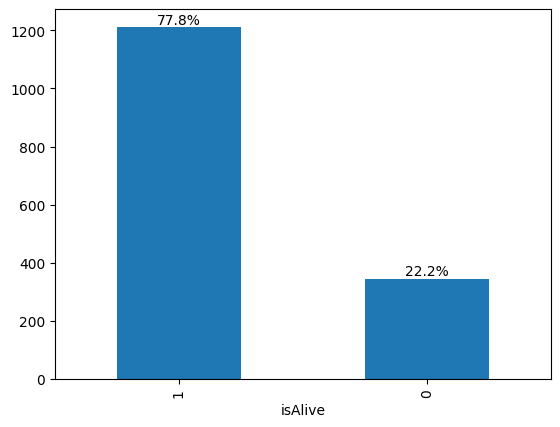

In [1124]:
total_count = len(df_preprocessed)
alive_counts = df_preprocessed.isAlive.value_counts()
percentages = alive_counts.values / total_count * 100

ax = alive_counts.plot.bar(x='isAlive', y='count')
for container in ax.containers:
    ax.bar_label(container, labels=[f'{pct:.1f}%' for pct in percentages])

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

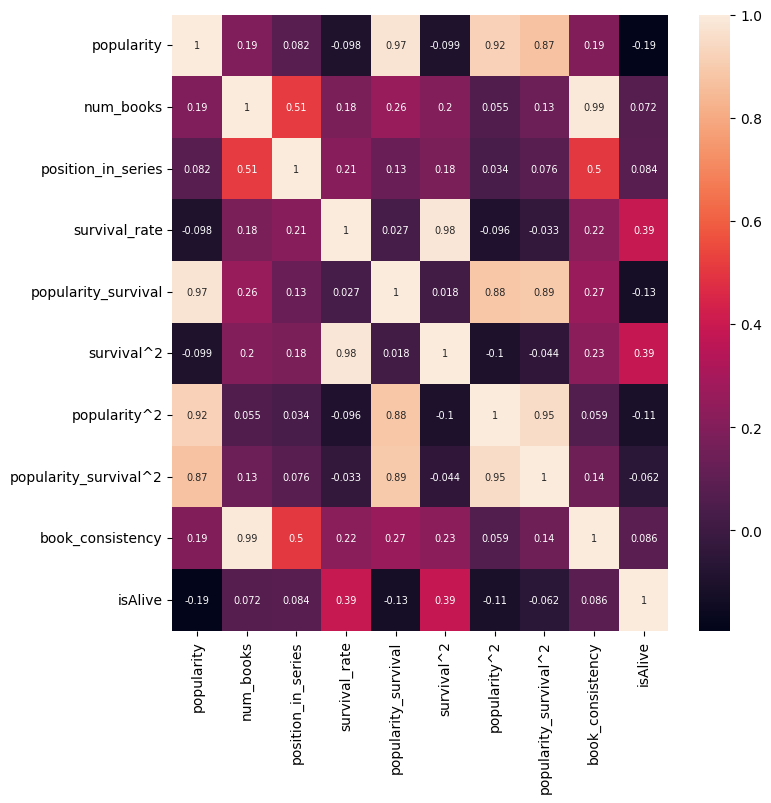

In [1125]:
fig = plt.figure(figsize=(8, 8))
ax = sns.heatmap(df_preprocessed.corr(), annot=True, annot_kws={'size': 7})

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [1126]:
# ...

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [1127]:
X = df.drop(columns=["isAlive"])
y = df.isAlive

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [1128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [1129]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [1130]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [1131]:
# # Шаг 1. создание модели
# logistic_regression = LogisticRegression(C=1)

# # Шаг 2. обучение модели
# logistic_regression.fit(X_train, y_train)

# # Шаг 3. Предсказание на тестовых данных
# y_pred = logistic_regression.predict(X_test)

In [1132]:
steps = [
    ('Data Preprocessing', Preprocessor()),
    ('Data Scaling', StandardScaler()),
    ('Logistic Regression', LogisticRegression(class_weight='balanced'))
]

pipeline = Pipeline(steps)

In [1133]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7500


In [1134]:
model_param_grid = {
    "LogisticRegression": (
        LogisticRegression(max_iter=200),
        {'classifier__C': [0.1, 1, 10], 'classifier__penalty': ['l2']}
    ),
    "AdaBoostClassifier": (
        AdaBoostClassifier(),
        {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1]}
    ),
    "RandomForestClassifier": (
        RandomForestClassifier(),
        {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [5, 10, 20]}
    ),
    "GaussianProcessClassifier": (
        GaussianProcessClassifier(),
        {}
    ),
    "GaussianNB": (
        GaussianNB(),
        {}
    ),
    "KNeighborsClassifier": (
        KNeighborsClassifier(),
        {'classifier__n_neighbors': [3, 5, 7], 'classifier__weights': ['uniform', 'distance']}
    ),
    "SVC": (
        SVC(),
        {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}
    ),
    "DecisionTreeClassifier": (
        DecisionTreeClassifier(),
        {'classifier__max_depth': [None, 10, 20], 'classifier__criterion': ['gini', 'entropy']}
    ),
}

results = {}

for model_name, (model, param_grid) in model_param_grid.items():
    print(f"Running GridSearchCV for {model_name}...")

    pipeline = Pipeline([
    ('Data Preprocessor', Preprocessor()),
    ('Data Scaler', StandardScaler()),
    ('classifier', model)
    ])

    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X, y)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    results[model_name] = {
        "best_params": best_params, "best_score": best_score
    }

print("\nGridSearchCV Results:")
for model_name, result in results.items():
    print(f"{model_name}: Best Score = {result['best_score']:.4f}, Best Params = {result['best_params']}")

Running GridSearchCV for LogisticRegression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Running GridSearchCV for AdaBoostClassifier...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Running GridSearchCV for RandomForestClassifier...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Running GridSearchCV for GaussianProcessClassifier...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Running GridSearchCV for GaussianNB...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Running GridSearchCV for KNeighborsClassifier...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Running GridSearchCV for SVC...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Running GridSearchCV for DecisionTreeClassifier...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

GridSearchCV Results:
LogisticRegression: Best Score = 0.8041, Best Params = {'classifier__C': 1, 'classifier__penalty': 'l2'}
AdaBoostClassifier: Best

In [1137]:
best_model = grid_search.best_estimator_
print(best_model)
importances = best_model.named_steps['classifier'].feature_importances_
for feature, importance in zip(df_preprocessed.drop(columns=['isAlive']).columns, importances):
    print(feature, importance)

Pipeline(steps=[('Data Preprocessor', Preprocessor()),
                ('Data Scaler', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10))])
popularity 0.14017763059848126
num_books 0.0258030907833932
position_in_series 0.03573873325771724
survival_rate 0.26688907098175635
popularity_survival 0.12207306627407237
survival^2 0.12439934948405441
popularity^2 0.16236834315802484
popularity_survival^2 0.10069808370294678
book_consistency 0.021852631759553515


[[ 24  50]
 [ 18 220]]


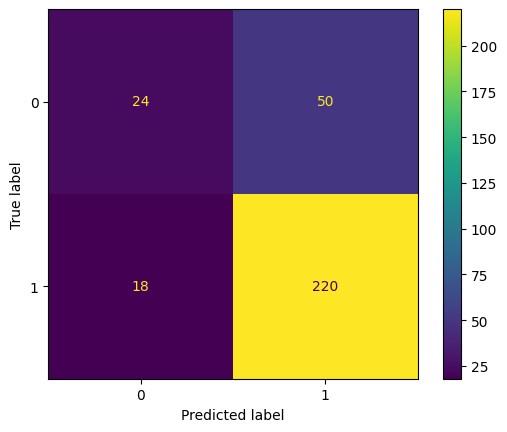

In [1138]:
from sklearn.metrics import ConfusionMatrixDisplay

pipeline = Pipeline([
    ('Data Preprocessor', Preprocessor()),
    ('Data Scaler', StandardScaler()),
    # ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=10))
    ('classifier', AdaBoostClassifier(learning_rate=1, n_estimators=100))
    # ('classifier', RandomForestClassifier(max_depth=10, n_estimators=200))
    # ('classifier', KNeighborsClassifier(n_neighbors=7, weights='uniform'))
    ])

X, y = df.drop(columns={"isAlive"}), df.isAlive
pipeline.fit(X_train, y_train)
y_pred_best = pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred_best))
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)

In [1018]:
test = pd.read_csv(DATA_DIR/"game_of_thrones_test.csv", index_col="S.No")

pipeline = Pipeline([
    ('Data Preprocessor', Preprocessor()),
    ('Data Scaler', StandardScaler()),
    # ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=10))
    ('classifier', AdaBoostClassifier(learning_rate=1, n_estimators=100))
    # ('classifier', RandomForestClassifier(max_depth=10, n_estimators=200))
    # ('classifier', KNeighborsClassifier(n_neighbors=7, weights='uniform'))
    ])

X, y = df.drop(columns={"isAlive"}), df.isAlive
pipeline.fit(X, y)
predictions = pipeline.predict(test)
predictions.shape

(389,)

In [1022]:
importances = pipeline.named_steps['classifier'].feature_importances_
for feature, importance in zip(df_preprocessed.drop(columns=['isAlive']).columns, importances):
    print(feature, importance)

popularity 0.07440960441665229
num_books 0.006404082099654682
survival_rate 0.37417852664741713
popularity_survival 0.10762455802737293
survival^2 0.17229176459129034
popularity^2 0.17119211176306193
popularity_survival^2 0.0674855199542827
book_consistency 0.026413832500267843


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7917


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7917


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [1011]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 12.3MB/s]


In [1012]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [1013]:
submission["isAlive"] = predictions
submission

,isAlive
S.No,
1558,1
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [1014]:
submission.to_csv("/content/new_submission.csv", index=False)